In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import finpy_tse as tse
from my_func_pkg import build_dependency_data
from sklearn.preprocessing import normalize

In [3]:
df = tse.get_price_history('عیار', ignore_date=True)

In [4]:
df

,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market
J-Date,,,,,,,,,,,
1397-03-19,10000,10000,10000,10000,10000,14685847,146858470000,1662,عیار,صندوق طلای عیار مفید,نامعلوم
1397-03-20,10000,10000,10000,10000,10000,7612448,76124480000,1054,عیار,صندوق طلای عیار مفید,نامعلوم
1397-03-21,10000,10000,10000,10000,10000,11192216,111922160000,1279,عیار,صندوق طلای عیار مفید,نامعلوم
1397-03-22,10000,10000,10000,10000,10000,8526625,85266250000,1063,عیار,صندوق طلای عیار مفید,نامعلوم
1397-03-23,10000,10000,10000,10000,10000,17370306,173703060000,2132,عیار,صندوق طلای عیار مفید,نامعلوم
...,...,...,...,...,...,...,...,...,...,...,...
1402-12-05,86573,87080,85400,85760,86263,11672702,1006919009426,8120,عیار,صندوق طلای عیار مفید,نامعلوم
1402-12-07,86800,86800,85380,85396,85860,12254766,1052190469664,9248,عیار,صندوق طلای عیار مفید,نامعلوم
1402-12-08,86050,86240,85100,85189,85569,9538563,816208716624,6900,عیار,صندوق طلای عیار مفید,نامعلوم


In [5]:
maxv = np.max(df.Volume.values)
maxc = np.max(df.Close.values)
v = df.Volume.values / maxv
c = df.Close.values / maxc

In [6]:
xv, yv = build_dependency_data(v, 5)

In [7]:
xc, yc = build_dependency_data(c, 5)

In [8]:
#x = xc[:]

In [9]:
x = np.concatenate([xc, xv], axis=1)

In [10]:
x = x.reshape((x.shape[0], x.shape[1], 1))

In [11]:
y = yc[:]

In [12]:
x_train = x[:3600, :]
y_train = y[:3600]
x_test = x[3600:, :]
y_test = y[3600:]

In [13]:
#x_train

In [14]:
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras.models import Sequential

In [15]:
model = Sequential()

In [16]:
model.add(LSTM(64, activation='relu', input_shape=(10, 1)))
#model.add(LSTM(10))
model.add(Dense(1))

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.fit(x_train, y_train, batch_size=135, epochs=150)

Epoch 1/150
11/11 [==============================] - 3s 18ms/step - loss: 0.1691
Epoch 2/150
11/11 [==============================] - 0s 21ms/step - loss: 0.1244
Epoch 3/150
11/11 [==============================] - 0s 18ms/step - loss: 0.0624
Epoch 4/150
11/11 [==============================] - 0s 19ms/step - loss: 0.0270
Epoch 5/150
11/11 [==============================] - 0s 21ms/step - loss: 0.0170
Epoch 6/150
11/11 [==============================] - 0s 17ms/step - loss: 0.0096
Epoch 7/150
11/11 [==============================] - 0s 17ms/step - loss: 0.0055
Epoch 8/150
11/11 [==============================] - 0s 19ms/step - loss: 0.0052
Epoch 9/150
11/11 [==============================] - 0s 17ms/step - loss: 0.0045
Epoch 10/150
11/11 [==============================] - 0s 15ms/step - loss: 0.0036
Epoch 11/150
11/11 [==============================] - 0s 19ms/step - loss: 0.0026
Epoch 12/150
11/11 [==============================] - 0s 16ms/step - loss: 0.0021
Epoch 13/150
11/11 [=====

In [19]:
out = model.predict(x)

In [20]:
out = np.concatenate([np.array([np.nan] * 5).reshape((5, 1)), out], axis=0)

In [21]:
out.shape

(1357, 1)

In [22]:
y.shape

(1352,)

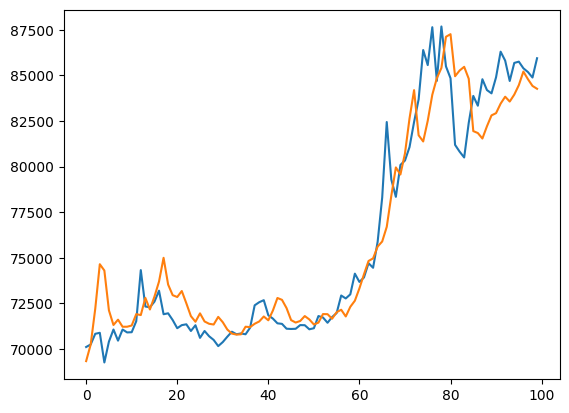

In [23]:
plt.plot(df.Close.values[-100:])
plt.plot(out[-100:] * maxc)

In [24]:
df.Close.values[-1]

85947

In [25]:
x[-1]

array([[0.88751942],
       [0.88824443],
       [0.88447437],
       [0.8823304 ],
       [0.8792232 ],
       [0.15008801],
       [0.33827839],
       [0.35514677],
       [0.2764304 ],
       [0.34735823]])

In [26]:
model.predict(x[-1].reshape(1, 10, 1)) * maxc

array([[84270.48516273]])

In [27]:
df.Close.values[-2]

84889

Text(200, 7500, '-277.15292023150965')

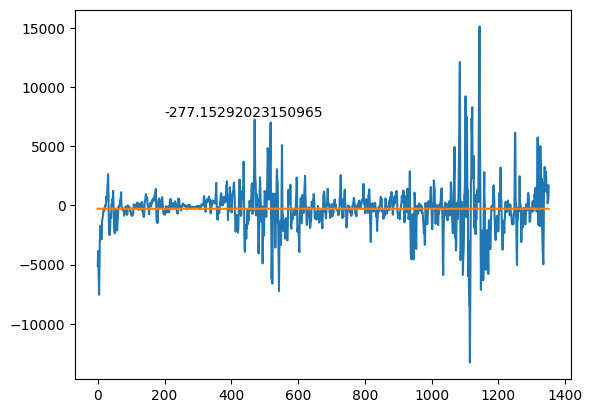

In [28]:
plt.plot(df.Close.values[5:] - (out[5:] * maxc).reshape(1352, ))
plt.plot([np.mean(df.Close.values[5:] - (out[5:] * maxc).reshape(1352, ))] * len(out[5:]))
plt.text(x=200, y=7500, s=np.mean(df.Close.values[5:] - (out[5:] * maxc).reshape(1352, )))

In [29]:
df.Close.values[5:] - (out[5:] * maxc).reshape(1352, )

array([-5096.80657014, -3846.69464669, -5335.91369972, ...,
         391.62000859,   461.8741616 ,  1676.52059209])

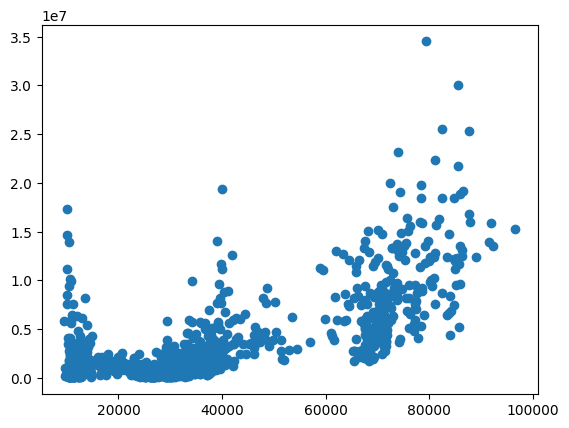

In [30]:
plt.scatter(df.Close.values, df.Volume.values)

In [31]:
from my_func_pkg import exp_change

In [32]:
exp_change(df.Close)

array([1.        , 1.        , 1.        , ..., 0.997576  , 0.99647842,
       1.01246333])

In [33]:
exp_change(df.Volume)

array([0.51835267, 1.47025188, 0.76183528, ..., 0.77835538, 1.25658477,
       1.57154727])

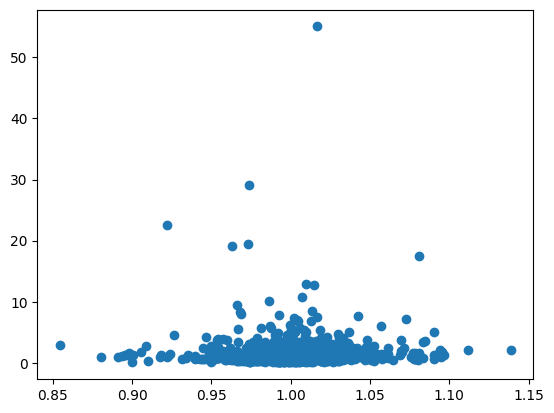

In [34]:
plt.scatter(exp_change(df.Close), exp_change(df.Volume))

In [35]:
from my_func_pkg import auto_correlation_function

In [36]:
auto_correlation_function(df.Close, df.Volume)

C:\Users\ADMIN\PycharmProjects\venv\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\ADMIN\PycharmProjects\venv\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([       nan,        nan,        nan, ..., 0.70857171, 0.70928395,
       0.71040762])

C:\Users\ADMIN\PycharmProjects\venv\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\ADMIN\PycharmProjects\venv\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


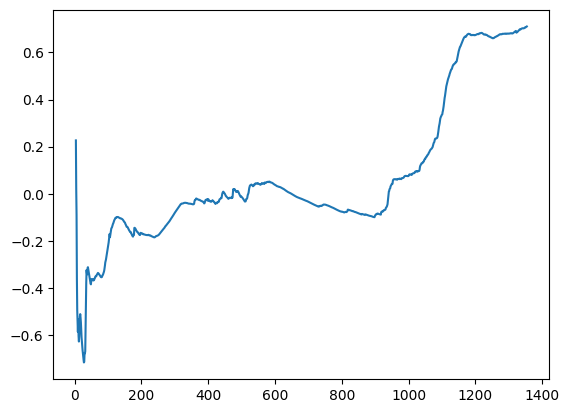

In [37]:
plt.plot(auto_correlation_function(df.Close, df.Volume))

In [38]:
from my_func_pkg import cor_during_time

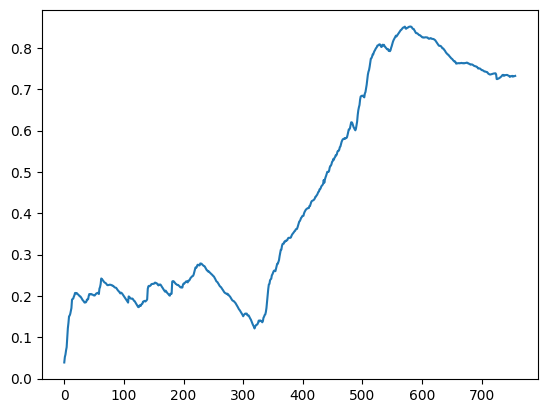

In [39]:
plt.plot(cor_during_time(df.Close, df.Volume, time_period=600))

In [40]:
from my_func_pkg import key_index

In [41]:
key_index(cor_during_time(df.Close, df.Volume, time_period=600),point_num=5,max_iter=200)

array([ 87, 324, 545, 702])

In [42]:
np.sort(key_index(cor_during_time(df.Close, df.Volume, time_period=600),point_num=5,max_iter=200))

array([ 89, 333, 530, 700])

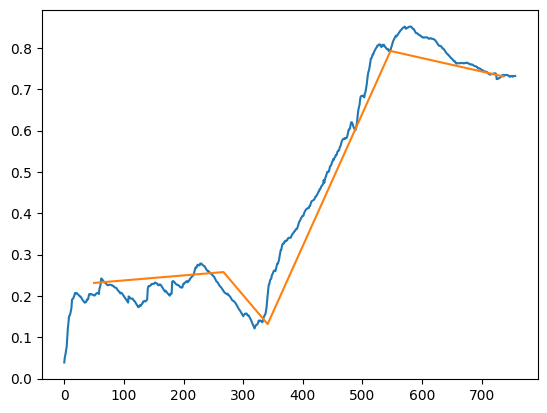

In [45]:
plt.plot(cor_during_time(df.Close, df.Volume, time_period=600))
plt.plot(key_index(cor_during_time(df.Close, df.Volume, time_period=600),point_num=6,max_iter=300)
,cor_during_time(df.Close, df.Volume, time_period=600)[key_index(cor_during_time(df.Close, df.Volume, time_period=600),point_num=6,max_iter=300)])